# Flights arrival

Data Lit Homework assignment by Denis Volchugin
16/02/2019

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [6]:
df = pd.read_csv('../data/formatted_flights.csv')

In [7]:
df.head()

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.


In [18]:
df.set_index('Unnamed: 0', inplace=True)

In [19]:
df.drop(df.index[0], inplace=True)

In [20]:
df.arr_delay = df.arr_delay.astype('float64')

In [21]:
df.describe(include='all')

,arr_delay,name
count,317112.000000,317112
unique,NaN,16
top,NaN,United Air Lines Inc.
freq,NaN,56358
mean,1.297113,NaN
std,29.064442,NaN
min,-60.000000,NaN
25%,-17.000000,NaN
50%,-6.000000,NaN
75%,11.000000,NaN


## Number of flights by company

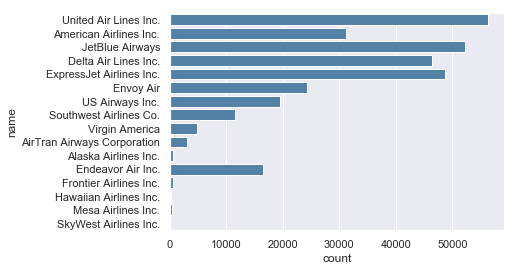

In [22]:
sns.countplot (y=df.name, orient='v', color='steelblue')

## Mean of arrival delay by company

In [23]:
mean = df.pivot_table(values='arr_delay', index='name', aggfunc=np.mean)

<BarContainer object of 16 artists>

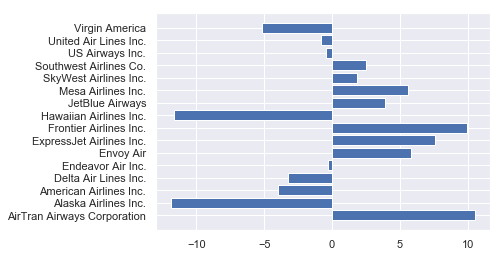

In [24]:
plt.barh(mean.index, mean.arr_delay)

## Standard deviation of arrival delay by company

In [25]:
std = df.pivot_table(values='arr_delay', index='name', aggfunc=np.std)

<BarContainer object of 16 artists>

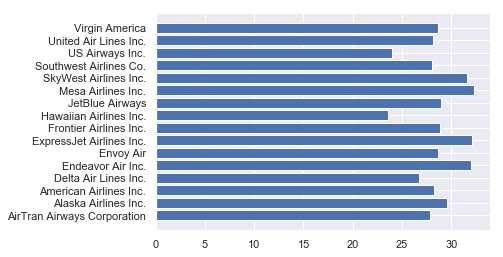

In [26]:
plt.barh(std.index, std.arr_delay)

## Distribution of observations by company

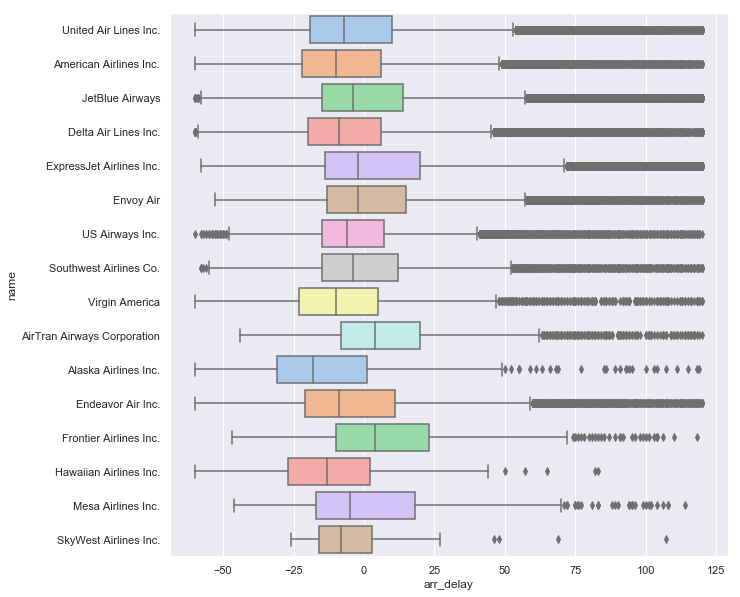

In [27]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x=df.arr_delay, y=df.name, palette="pastel", ax=ax)

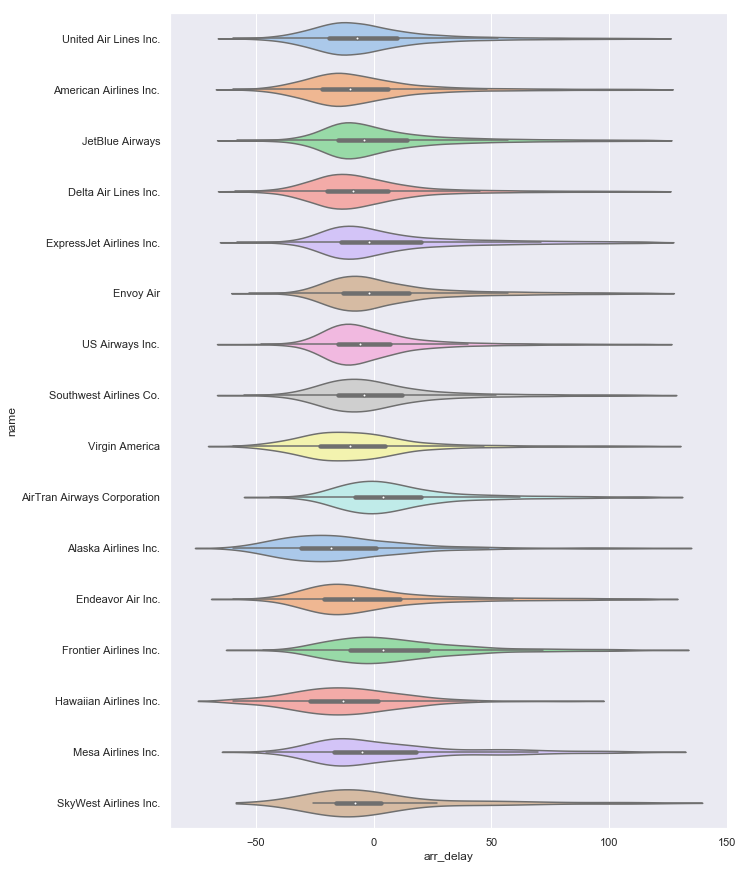

In [28]:
fig, ax = plt.subplots(figsize=(10, 15)) 
sns.violinplot(x=df.arr_delay, y=df.name, palette="pastel", ax=ax)

## Density plots

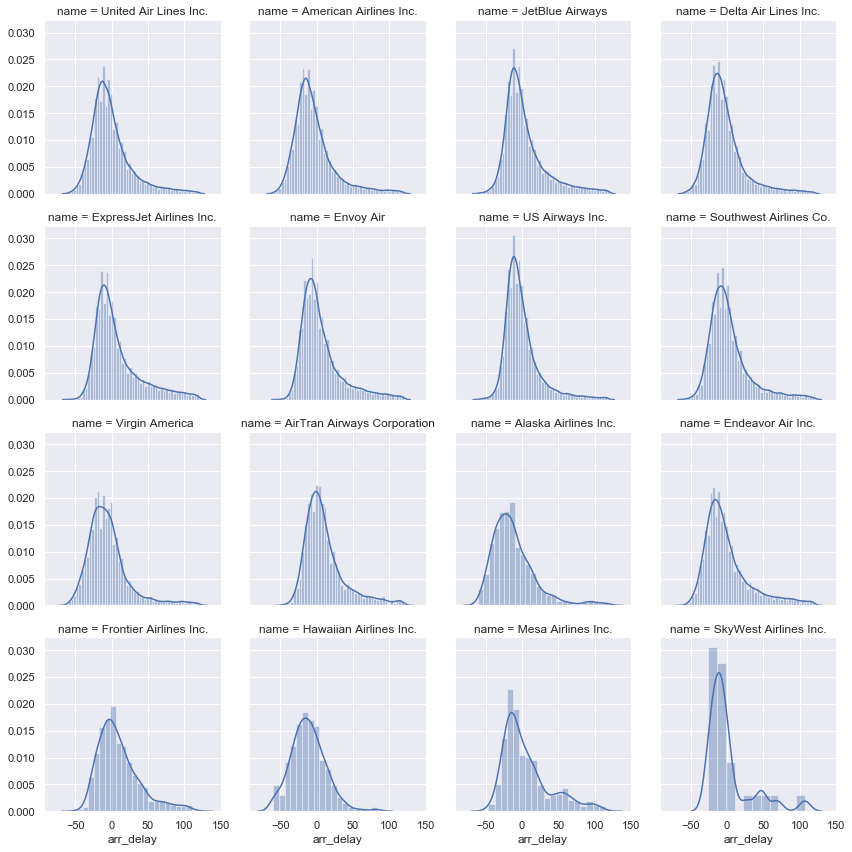

In [30]:
ordered_carrier = df.name.value_counts().index
g = sns.FacetGrid(df, col="name", col_wrap=4, height=3, aspect=1, row_order=ordered_carrier)
g.map(sns.distplot, "arr_delay", hist=True, rug=False);

## Conclusion #1

At this point I would choose US Airways Inc. since the company demonstrates best results in "coming on-time". The arrival delay in 50% cases is within +/- 10 min. Density of scheduled arrival is the best vs competitors.

# Check different samples of data

### 5000 sample

In [31]:
frames = list()
for name in df['name'].unique():
    frame = df[df['name'] == name].sample(5000, replace=True)
    frames.append(frame)

df1 = pd.concat(frames)
df1.describe()

,arr_delay
count,80000.000000
mean,0.760725
std,29.736886
min,-60.000000
25%,-18.000000
50%,-6.000000
75%,11.000000
max,120.000000


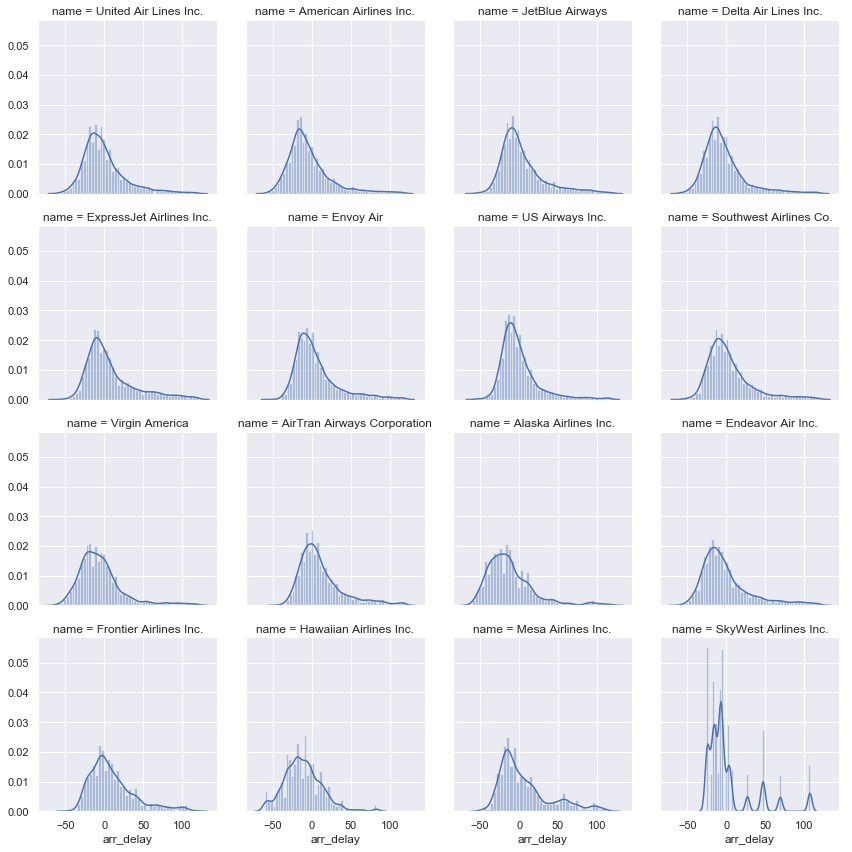

In [32]:
g = sns.FacetGrid(df1, col="name", col_wrap=4, height=3, aspect=1)
g.map(sns.distplot, "arr_delay", hist=True, rug=False);

In [33]:
df1.pivot_table(values='arr_delay', index='name', aggfunc={'count','mean', np.std,'min', 'max'})

,count,max,mean,min,std
name,,,,,
AirTran Airways Corporation,5000,120.0,11.3270,-43.0,28.421879
Alaska Airlines Inc.,5000,119.0,-12.0020,-60.0,29.913999
American Airlines Inc.,5000,118.0,-3.6168,-59.0,28.374478
Delta Air Lines Inc.,5000,120.0,-3.4294,-60.0,27.267595
Endeavor Air Inc.,5000,120.0,-0.9366,-60.0,32.033323
Envoy Air,5000,120.0,5.2392,-53.0,28.176557
ExpressJet Airlines Inc.,5000,120.0,7.4814,-57.0,32.095303
Frontier Airlines Inc.,5000,118.0,9.9044,-47.0,29.286242
Hawaiian Airlines Inc.,5000,83.0,-11.3246,-60.0,23.853156


### 10 000 sample

In [34]:
frames = list()
for name in df['name'].unique():
    frame = df[df['name'] == name].sample(10000, replace=True)
    frames.append(frame)

df2 = pd.concat(frames)
df2.describe()

,arr_delay
count,160000.000000
mean,0.530675
std,29.329056
min,-60.000000
25%,-18.000000
50%,-6.000000
75%,11.000000
max,120.000000


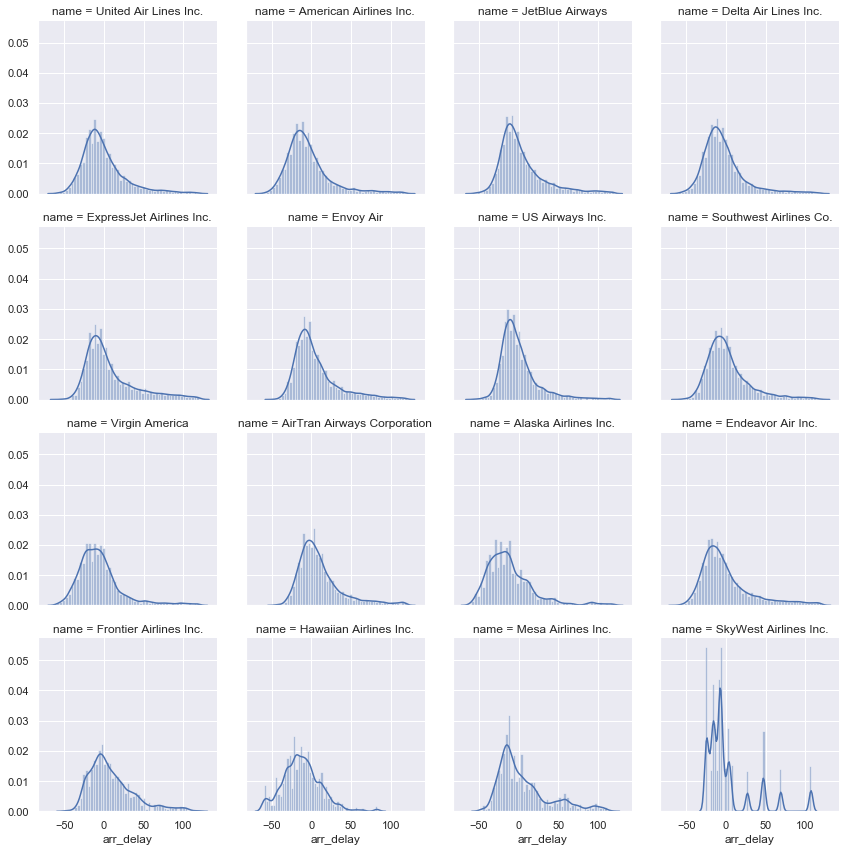

In [35]:
g = sns.FacetGrid(df2, col="name", col_wrap=4, height=3, aspect=1)
g.map(sns.distplot, "arr_delay", hist=True, rug=False);

### 50 000 sample

In [36]:
frames = list()
for name in df['name'].unique():
    frame = df[df['name'] == name].sample(50000, replace=True)
    frames.append(frame)

df3 = pd.concat(frames)
df3.describe()

,arr_delay
count,800000.000000
mean,0.629432
std,29.492540
min,-60.000000
25%,-18.000000
50%,-6.000000
75%,11.000000
max,120.000000


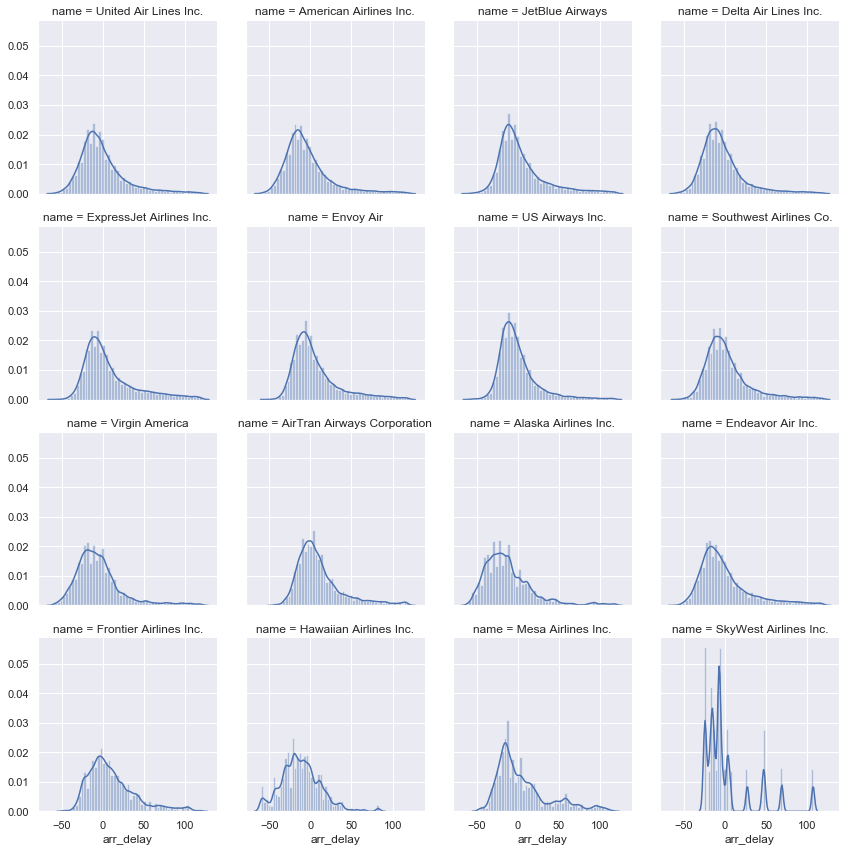

In [37]:
g = sns.FacetGrid(df3, col="name", col_wrap=4, height=3, aspect=1)
g.map(sns.distplot, "arr_delay", hist=True, rug=False);

### 100 000 sample

In [38]:
frames = list()
for name in df['name'].unique():
    frame = df[df['name'] == name].sample(100000, replace=True)
    frames.append(frame)

df4 = pd.concat(frames)
df4.describe()

,arr_delay
count,1.600000e+06
mean,6.035750e-01
std,2.946119e+01
min,-6.000000e+01
25%,-1.800000e+01
50%,-6.000000e+00
75%,1.100000e+01
max,1.200000e+02


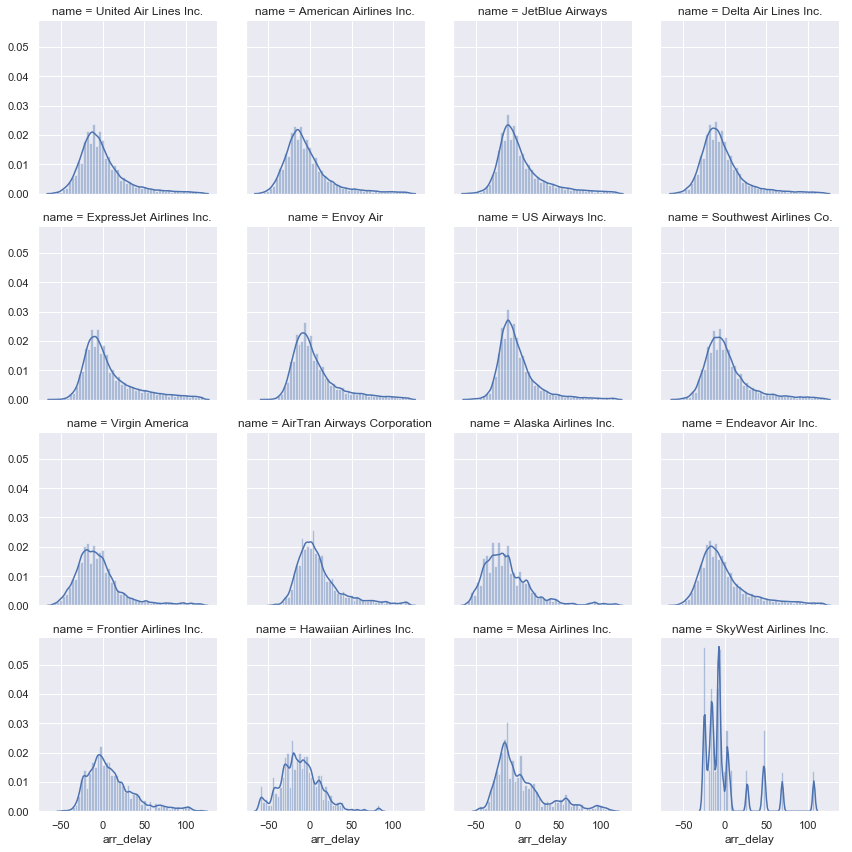

In [39]:
g = sns.FacetGrid(df4, col="name", col_wrap=4, height=3, aspect=1)
g.map(sns.distplot, "arr_delay", hist=True, rug=False);

In [40]:
df4.pivot_table(values='arr_delay', index='name', aggfunc={'count','mean', np.std,'min', 'max'})

,count,max,mean,min,std
name,,,,,
AirTran Airways Corporation,100000,120.0,10.66359,-44.0,27.894310
Alaska Airlines Inc.,100000,119.0,-11.94129,-60.0,29.431152
American Airlines Inc.,100000,120.0,-3.95334,-60.0,28.191372
Delta Air Lines Inc.,100000,120.0,-3.34526,-60.0,26.596503
Endeavor Air Inc.,100000,120.0,-0.45573,-60.0,31.770049
Envoy Air,100000,120.0,5.70200,-53.0,28.530248
ExpressJet Airlines Inc.,100000,120.0,7.50948,-58.0,32.119828
Frontier Airlines Inc.,100000,118.0,9.91460,-47.0,28.717952
Hawaiian Airlines Inc.,100000,83.0,-11.66295,-60.0,23.678164


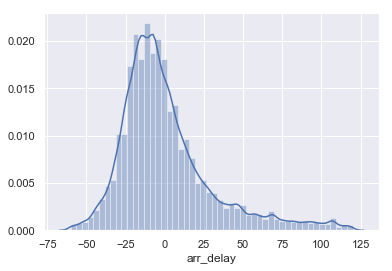

In [41]:
sns.distplot(df1.arr_delay, hist=True)

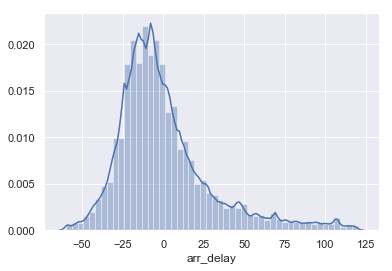

In [42]:
sns.distplot(df4.arr_delay, hist=True)

# Conclusion 2

In this case sampling distribution of a mean is not less spread then the values in total and it's getting closer with the samples of a bigger size.